# 9장. 잠재고객을 파악하기 위한 이미지 인식 테크닉
앞으로 공부할 9, 10장은 `비정형 데이터` 를 분석한다.  
여기서 9장은 `이미지 데이터`, 10장은 `자연어 처리(텍스트 데이터)` 이다.  

이미지 인식 기술은 무료 이미지 처리 라이브러리 OpenCV를 활용한다. 100%에 가까운 정확도는 안되지만, '어느 정도의 성능'을 기대한다면 좋음!

## Tech 81. 이미지 데이터를 불러오자

중요한 메서드 설명   
- `cv2.imread(path)` : 이미지  파일을 읽어온다.
- `cv2.imshow('file', file)` : 앞에서 읽어온 file명을 입력해 이미지 파일을 연다.

In [1]:
import cv2

In [2]:
img = cv2.imread('img/img01.jpg')
height, width = img.shape[:2]

print('이미지 가로: ', width)
print('이미지 세로: ', height)

이미지 가로:  1920
이미지 세로:  1440


여기서 주의해야 할 점이.. 저 imread 파일경로에 한글이 들어가면 Attribute 에러가 뜸. (9장에러 사진참고)  
구글링을 해보니 경로에 한글이 들어가면 그렇다고 함... 그래서 무조건 영어경로로 써주기!

In [3]:
cv2.imshow('img', img)
cv2.waitKey(0) #사진이 큰 창으로 크게 출력됨.

-1

`waitKey`는 몇 초 동안 이미지를 표시할지 밀리초(ms)  단위로 지정한다.  
예를 들어 1000 지정 시 1초동안 표시함. 다만 0을 지정하면 윈도우를 닫을 때까지 계속해서 보여줌

## Tech 82. 동영상 데이터를 불러오자

중요 메서드 설명  
- `cap = cv2.VideoCapture(path)` : 동영상 파일을 불러온다.
- `cap.read()` : 영상 정보를 읽어온다.
- `cv2.imshow('file', file)` : 영상 파일을 연다.

In [4]:
import cv2

In [5]:
#동영상 불러오기
cap = cv2.VideoCapture('mov/mov01.avi')
cap

<VideoCapture 00000258522B6B50>

In [6]:
#동영상 정보 
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

print('가로: ', str(width))
print('세로: ', str(height))
print('총 프레임수: ', str(count))
print('FPS: ' + str(fps))

가로:  1920.0
세로:  1440.0
총 프레임수:  401.0
FPS: 30.0


In [7]:
#동영상 출력 - 실행시 큰 창으로 출력 
while(cap.isOpened()):
    ret, frame = cap.read() #동영상 정보 읽어오기 -read
    if ret:
        cv2.imshow('frame', frame) #frame은 이미지 정보이므로 imshow 로 읽어들일 수 있음 
    if cv2.waitKey(1) & 0xFF == ord('q'): #각 frame을 1밀리초 동안 표시후 다음 프레임으로 이동 , 모든 프레임 처리후 'q' 키 누르면 종료
        break
        
cap.release()
cv2.destroyAllWindows()

## Tech 83. 동영상을 이미지로 나누고 저장하자
동영상을 분할해 이미지로 저장하는 것은 **실제 현장**에선 중요한 의미가 있다.  
앞서 다룬 mov01.avi 동영상을 snapshot2 폴더에 이미지로 저장해보자.  

- `cv2.imwrite(path, file)` : 새로운 파일로 저장할 경로(path)를 설정한다.

In [8]:
import cv2
cap = cv2.VideoCapture('mov/mov01.avi') #동영상 불러오기
num = 0 

while(cap.isOpened()):
    ret, frame = cap.read() 
    if ret:
        cv2.imshow('frame', frame) 
        path = 'snapshot2/snapshot_' + str(num) + '.jpg' #이미지의 각 이름을 자동으로 지정
        cv2.imwrite(path, frame) #영상 -> 이미지로 저장 
        if cv2.waitKey(1) & 0xFF == ord('q'): #각 frame을 1밀리초 동안 표시후 다음 프레임으로 이동 , 모든 프레임 처리후 'q' 키 누르면 종료
            break
    num += 1
        
cap.release()
cv2.destroyAllWindows()

In [9]:
num

318

## Tech 84. 이미지 속에 사람이 어디있는지 검출하자
이는 사람을 HOG 특징량으로 표현해서 검출할 수 있다. img01 이라는 이미지 파일로부터 검출해보자.  
잘 만들어진 사람 인식 모델 SVMDetector를 사용하기   

- `hog = cv2.HOGDescriptor()` : HOG 객체 만들기
- `hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())` : SVMDetector 모델 지정하기
- `hogParams = {}` : 파라미터 지정하기

이미지에서 사람 검출  
- `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` : 흑백으로 변환
- `hog.detectMultiScale(흑백변환객체, **hogParams)` : 사람을 검출하고 그 위치정보 반환
- `cv2.rectangle(img, pt1, pt2, color, thickness )`  : 검출한 사람 주위에 사각형을 그림 - 사각형 정보 추가(크기, 색, 선굵기)   , pt1은 시작점 좌표(x,y), pt2는 종료점 좌표(x,y)임.

#### *참고*
참고로, 원래 색상은 `RGB` 타입이 디폴트지만, opencv는 `BGR`로 이미지를 로드한다.  
따라서 빨간색은 원래 (255, 0, 0) 이지만 여기서는 (0, 0, 255) 라고 써야 한다.

In [2]:
import cv2

#준비
hog = cv2.HOGDescriptor() #객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #모델지정 
hogParams = {'winStride': (8,8), 'padding': (32,32), 'scale': 1.05, 'hitThreshold': 0, 'finalThreshold': 5} #파라미터 설정 

In [3]:
#검출
img = cv2.imread('img/img01.jpg') #읽기 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #흑백변환 
human, r = hog.detectMultiScale(gray, **hogParams) #사람 검출 - human에는 사람의 위치정보가 들어감 

if (len(human)> 0): #사람으로 인식한게 1개 이상이라면 
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3) #사각형을 그려! (여기서 255,255,255는 white 색)
        
cv2.imshow('img', img) #출력 
cv2.waitKey(0)

-1

In [3]:
human

array([[ 334,  705,  244,  488],
       [ 953,  765,  311,  621],
       [1857,  684,   63,  183],
       [1505,  848,  183,  367],
       [1589,    1,   67,  135],
       [ 317,  640,   75,  149],
       [ 926,  662,   74,  148],
       [1699,  685,   76,  152],
       [1490,  836,   73,  145],
       [1420,  655,   98,  196],
       [ 494,  232,   85,  170]])

In [4]:
len(human)

11

그림을 보면 사람으로 잘못 파악한 게 있다(열차를 사람으로 인식했다거나..)  
그래도 이정도는 오차로 처리할 수 있다!

## Tech 85. 이미지 속에 사람 얼굴을 검출해보자
앞에선 '이 사진에서 사람이 어디 있냐?' 였다면 이번엔 '이 사진에서 사람 얼굴을 쏙 뽑아보자' 이다.  
얼굴 검출에는 전통적으로 `CascadeClassifier`를 사용한다. 얼굴 검출&개인 인증은 연구의 역사가 길고, 많은 라이브러리가 공개돼 있다!   

- `cascade = cv2.CascadeClassifier(file)` : CascadeClassifier 모델 지정

이미지에서 사람 얼굴 검출   
- `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` : 흑백으로 변환
- `cascade.detectMultiScale(흑백변환객체, size)` : 사람 얼굴을 검출하고 그 위치정보 반환
- `cv2.rectangle(img, size, color, thickness )` : 검출한 사람얼굴 주위에 사각형을 그림 - 사각형 정보 추가(크기, 색, 선굵기)

In [4]:
import cv2

#준비
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file) # (정면 얼굴 인식 모델)

In [5]:
cascade

<CascadeClassifier 000001C33B486B90>

In [6]:
#검출하기
img = cv2.imread('img/img02.jpg') #읽기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #흑백변환 
face_list = cascade.detectMultiScale(gray, minSize = (50,50)) #얼굴검출

for (x, y, w, h) in face_list:
    color = (0, 0, 225) #색 - red 
    pen_w = 3 #선굵기 
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness = pen_w) #정면얼굴에 사각형을 그려!
    
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.imshow('img', img)
cv2.imwrite('temp.jpg', img) #img 에 사각형 얼굴인식 한것을 'temp' 라는 이름으로 이미지 저장함 -> 저장된 것 확인 
cv2.waitKey(1000)
cv2.destroyAllWindows()

여기서 여러 객체 설명하자면  
- `cv2.namedWindow('file', cv2.WINDOW_NORMAL_)` : 'file' 이라는 이름으로 창을 생성함 
- `cv2.waitKey(숫자)` : 숫자 밀리세컨초만큼 이미지/영상 파일을 띄움, 0을 쓸 경우 무한정으로 띄워짐. X표시 눌러야 닫힘
- `cv2.destroyAllWindows()` : 모든 창 닫기
- `cv2.destroyWindow('file')` : 'file' 창만 닫기

In [9]:
face_list

array([[1051,   87,  182,  182]])

## Tech 86. 이미지 속 사람 얼굴이 어느쪽을 보고 있는지를 검출하자
여기선 `dlib` 라는 라이브러리를 활용해 얼굴을 눈, 코, 입, 윤곽의 68개 특징점으로 표현할 수 있다.  
이로써 **사람이 얼굴을 어느쪽으로 돌리고 있는지**와 같은 세세한 정보를 검출할 수 있음!   

아나콘다 프롬프트에 `pip install dlib` 실행

In [7]:
import cv2, dlib, math

dilb의 face detector와 landmark(shape) predictor를 이용해 얼굴 랜드마크(눈, 코, 입, 윤곽)를 찍어주자.  

필요 메서드   
- `detector = dlib.get_frontal_face_detector()` : 얼굴 전체(face, detector) - 이하 'd'
    - `dets = detector(img, 1)`
- `predictor= dlib.shape_predictor('..'`) : 얼굴 내 랜드마크(predictor) - 이하 'shape'
    - `shape = predictor(img, d)`

얼굴 전체 d에 사각형 그리기    
- `cv2.rectangle(img, size, color, line-thickness)`

얼굴 랜드마크 shape에 점 찍기(좌표 필요)
- `cv2.circle(img, (x좌표, y좌표), circle_r, color, line-thickness)` : 여기서 좌표는 shape_point.x, y로 들어있다.
- 이것은 랜드마크에 점을 딱딱딱 찍을때뿐만 아니라, 랜드마크 점들 중에서 중심점을 찍을 때도 사용함.

그림 위에 text 추가하기
- `cv2.putText(img, 텍스트, (x좌표, y좌표), fontType, fontSize, color, line-thickness)` : img 위에 텍스트가 원하는 위치에 입력됨.

In [8]:
#준비
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [9]:
#얼굴 랜드마크 검출
img = cv2.imread('img/img02.jpg') 
dets = detector(img, 1)
dets

rectangles[[(1061, 116) (1216, 270)]]

In [10]:
#얼굴 랜드마크 검출
img = cv2.imread('img/img02.jpg') #이미지 파일 불러오기
dets = detector(img, 1)

## 이제부터 인식된 얼굴 개수만큼 반복하여 얼굴 윤곽을 표시한다.
# k: 얼굴 인덱스, d: 얼굴 좌표

for k, d in enumerate(dets): 
    shape = predictor(img, d) #shape: 얼굴 랜드마크 추출 
    print(shape.num_parts) #추출된 점은 68개. 
    print(' ')
    
    #얼굴 영역 표시
        ## 색깔
    color_f = (0, 0, 255) #face - 빨강
    color_l_out = (255, 0, 0) #랜드마크 바깥쪽(out) - 파랑
    color_l_in = (0, 255, 0)    #랜드마크 안쪽(in) - 초록 
        ## 표시할 선, 도형
    line_width = 3
    circle_r = 3
        ## 글씨 
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 2
    
    #얼굴 자체(detector)에 사각형 그림 -근데 책에서 텍스트는 왜 쓰는거임? 필요없어서 뺐음 
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_width)
    
    #이제 랜드마크에 점을 찍어보자.
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0; gy_out = 0; gx_in = 0; gy_in = 0
    
    #점을 찍으려면 필요한 건 좌표!  -> 이는 shape.part(번호) 에 (x,y로) 들어있다.
    # 번호값을 하나씩 바꿔가며 좌표를 찍자.
    for i in range(shape.num_parts): #총 68개
        shape_point = shape.part(i)
        print('얼굴 랜드마크 No.{} 좌표위치: ({}, {})'.format(i, shape_point.x, shape_point.y))
        
        #얼굴 랜드마크마다 그리기
        ## i(랜드마크 번호)가 17보다 작으면 out(바깥쪽)을 그린다 - 파란색 점 
        if i < num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_width)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        
        ##반면 i가 17이상이면 in(안쪽)을 그린다 - 초록색 점 
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_width)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in
            
    #랜드마크에 톡톡톡 찍힌 점들 중에서도, 가장 중심위치를 표시해보자.
        #먼저 out(바깥쪽)은 빨강색
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r, (0,0,255), line_width)
        #그리고 in(안쪽)은 검은색 
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r, (0,0,0), line_width)
    
    
    #얼굴 방향 표시하기(정면인지? 측면인지? -> 앞서 만든 out, in 좌표로 계산!)
    theta = math.asin(2*(gx_in-gx_out) / (d.right() - d.left()))
    radian = theta*180/math.pi
    print(' ')
    print('얼굴방향: {0:.3f} (각도: {1:.3f}도)'.format(theta, radian))
    
    #이 얼굴방향과 각도를 face('d') 사각형 위에 출력 
    if radian < 0:
        textPrefix = 'left'
    else: 
        textPrefix = 'right'
        
    textShow = textPrefix + str(round(abs(radian), 1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_width)
    
    

68
 
얼굴 랜드마크 No.0 좌표위치: (1052, 164)
얼굴 랜드마크 No.1 좌표위치: (1055, 185)
얼굴 랜드마크 No.2 좌표위치: (1058, 206)
얼굴 랜드마크 No.3 좌표위치: (1063, 227)
얼굴 랜드마크 No.4 좌표위치: (1073, 246)
얼굴 랜드마크 No.5 좌표위치: (1086, 262)
얼굴 랜드마크 No.6 좌표위치: (1102, 275)
얼굴 랜드마크 No.7 좌표위치: (1122, 285)
얼굴 랜드마크 No.8 좌표위치: (1143, 286)
얼굴 랜드마크 No.9 좌표위치: (1162, 280)
얼굴 랜드마크 No.10 좌표위치: (1177, 266)
얼굴 랜드마크 No.11 좌표위치: (1186, 249)
얼굴 랜드마크 No.12 좌표위치: (1194, 229)
얼굴 랜드마크 No.13 좌표위치: (1197, 209)
얼굴 랜드마크 No.14 좌표위치: (1198, 188)
얼굴 랜드마크 No.15 좌표위치: (1197, 167)
얼굴 랜드마크 No.16 좌표위치: (1194, 149)
얼굴 랜드마크 No.17 좌표위치: (1077, 153)
얼굴 랜드마크 No.18 좌표위치: (1087, 146)
얼굴 랜드마크 No.19 좌표위치: (1100, 145)
얼굴 랜드마크 No.20 좌표위치: (1113, 146)
얼굴 랜드마크 No.21 좌표위치: (1126, 149)
얼굴 랜드마크 No.22 좌표위치: (1142, 146)
얼굴 랜드마크 No.23 좌표위치: (1150, 140)
얼굴 랜드마크 No.24 좌표위치: (1160, 134)
얼굴 랜드마크 No.25 좌표위치: (1172, 130)
얼굴 랜드마크 No.26 좌표위치: (1182, 132)
얼굴 랜드마크 No.27 좌표위치: (1136, 156)
얼굴 랜드마크 No.28 좌표위치: (1139, 169)
얼굴 랜드마크 No.29 좌표위치: (1142, 182)
얼굴 랜드마크 No.30 좌표위치: (1145, 196)
얼굴 랜드마크 No.31

In [11]:
cv2.namedWindow('img')
cv2.imshow('img', img)
cv2.imwrite('temp.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Tech 87. 검출한 정보로 타임랩스를 만들어보자.
다시 앞의 동영상 데이터로 돌아가자.  
장시간 정보를 모두 눈으로 확인하는 것은 시간이 오래 걸린다. 이 때 '타임랩스'를 활용하면 좋다.  
타임랩스란 **일정 기간의 프레임 중에서 1프레임만 꺼내는 '빠르게 재생하기' 기법** 이다. 간단한 경향을 빠르게 파악하는 데 용이함!

필요한 메서드  
- `cv2.VideoWriter_fourcc(파라미터 4개 지정)` : 4개의 동영상 데이터 포맷 지정. X, V, I, D 로 지정한 경우 avi 형식으로 만들어짐 
- `cv2.VideoWriter(filename, fourcc, fps, (width, height), isColor=None)` : fps는 초당 프레임 수를 의미, isColor는 디폴트가 True(컬러영상)

---
- 원래 mov01 영상은 12초 ->  타임랩스 결과, 사람으로 인식하면 네모를 그리며 1초로 줄어듦
- 1000ms = 1초임.
- fps는 초당 프레임 수임. 여기서 fps는 30임(나와있음), 근데 fps를 30으로 했으므로 

In [19]:
import cv2
print('타임랩스 생성 시작')

#동영상 읽어오기 .앞에서 쓴거 복붙 
cap = cv2.VideoCapture('mov/mov01.avi')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#hog 객체 - 사람이 어디 있는지 판단. 앞에서 쓴거 복붙
hog = cv2.HOGDescriptor() #객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #모델지정 
hogParams = {'winStride': (8,8), 'padding': (32,32), 'scale': 1.05, 'hitThreshold': 0, 'finalThreshold': 5} #파라미터 설정 


#타임랩스 작성
movie_name = 'timelapse2.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID') #'X', 'V', 'I', 'D'로 써도 됨 
video = cv2.VideoWriter(movie_name, fourcc, 30, (width, height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10 == 0): #10으로 나누어 떨어지는 경우만(41개 프레임만)
                            ## 영상길이를 압축하기 위해 이 프레임만 사람을 인식해 네모로 넣는다.
                            ## 그결과, 12초였던 영상이 1.2초로 줄어듦 
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human) > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,255), 3)
            video.write(frame)
            
    else: break
    num += 1
    
#타임랩스 종료 및 발행 
video.release()
cap.release()
cv2.destroyAllWindows()
print('타임랩스 생성 완료')

타임랩스 생성 시작
타임랩스 생성 완료


In [14]:
num

401

In [20]:
sy = 0
for i in range(num):
    if i%10 == 0:
        sy += 1
    else: pass
    
sy

41

## Tech 88. 동영상 내 사람의 수를 그래프로 나타내자.
영상이 흐름에 따라 사람으로 인식하는 숫자가 어떻게 바뀌는지, 시계열 그래프를 만들어보자!  
-> 즉, x축은 time, y축은 사람 수로 보면 되겠지?

In [40]:
#위에서 한거랑 timelapse 부분 코드만 바꿈 

import cv2
import pandas as pd
print('분석 시작')

#동영상 읽어오기 .앞에서 쓴거 복붙 
cap = cv2.VideoCapture('mov/mov01.avi')
fps = cap.get(cv2.CAP_PROP_FPS)

#hog 객체 - 사람이 어디 있는지 판단. 앞에서 쓴거 복붙
hog = cv2.HOGDescriptor() #객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #모델지정 
hogParams = {'winStride': (8,8), 'padding': (32,32), 'scale': 1.05, 'hitThreshold': 0, 'finalThreshold': 5} #파라미터 설정 


#그래프 작성 
num = 0
list_df = pd.DataFrame(columns = ['time', 'people'])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10 == 0): #10으로 나누어 떨어지는 경우만(41개 프레임만)
                            ## 영상길이를 압축하기 위해 이 프레임만 사람을 인식해 네모로 넣는다.
                            ## 그결과, 12초였던 영상이 1.2초로 줄어듦 
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams) #그 뒤에 이어지는 사각형 표시는 여기선 필요없으므로 지움
#             if (len(human) > 0):
#                 for (x, y, w, h) in human:
#                     cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,255), 3)

            tmp = pd.Series([num/fps, len(human)], index = list_df.columns)
            list_df = list_df.append(tmp, ignore_index = True)
            #display(list_df)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    else: break
    num += 1
    
#종료
cap.release()
cv2.destroyAllWindows()
print('분석 종료')

분석 시작
분석 종료


In [26]:
list_df

,time,people
0,0.000000,5.0
1,0.333333,11.0
2,0.666667,11.0
3,1.000000,7.0
4,1.333333,9.0
5,1.666667,11.0
6,2.000000,6.0
7,2.333333,8.0
8,2.666667,13.0
9,3.000000,12.0


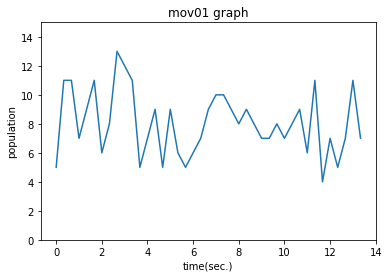

In [41]:
#이제 list_df로 그래프 그려보자.
import matplotlib.pyplot as plt

plt.plot(list_df['time'], list_df['people'])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.title('mov01 graph')
plt.ylim(0, 15)
plt.show()

## Tech 89. 다른 동영상을 가져와서 해보자.
똑같은 방식으로, mov01을 mov02로 바꿔서 해보자. 영상이 바뀌었을 때! (영상 캡쳐 넣기)

In [42]:
######### 위에서 한거랑 동일 ############

import cv2
import pandas as pd
print('분석 시작')

#동영상 읽어오기 .앞에서 쓴거 복붙 
cap = cv2.VideoCapture('mov/mov02.avi') # -----------------> 얘만 바꿈 
fps = cap.get(cv2.CAP_PROP_FPS)

#hog 객체 - 사람이 어디 있는지 판단. 앞에서 쓴거 복붙
hog = cv2.HOGDescriptor() #객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #모델지정 
hogParams = {'winStride': (8,8), 'padding': (32,32), 'scale': 1.05, 'hitThreshold': 0, 'finalThreshold': 5} #파라미터 설정 


#그래프 작성 
num = 0
list_df2 = pd.DataFrame(columns = ['time', 'people'])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10 == 0): #10으로 나누어 떨어지는 경우만(41개 프레임만)
                            ## 영상길이를 압축하기 위해 이 프레임만 사람을 인식해 네모로 넣는다.
                            ## 그결과, 12초였던 영상이 1.2초로 줄어듦 
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams) #그 뒤에 이어지는 사각형 표시는 여기선 필요없으므로 지움
#             if (len(human) > 0):
#                 for (x, y, w, h) in human:
#                     cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,255), 3)

            tmp = pd.Series([num/fps, len(human)], index = list_df2.columns)
            list_df2 = list_df2.append(tmp, ignore_index = True)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    else: break
    num += 1
    
#종료
cap.release()
cv2.destroyAllWindows()
print('분석 종료')

분석 시작
분석 종료


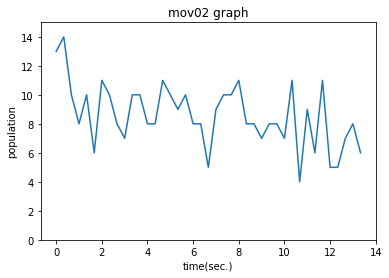

In [43]:
#이제 list_df2로 그래프 그려보자.
import matplotlib.pyplot as plt

plt.plot(list_df2['time'], list_df2['people'])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.title('mov02 graph')
plt.ylim(0, 15)
plt.show()

In [ ]:
#아님 굳이 프레임 40개 말고 전체를 써도 될듯..? (근데 시간 오래 걸릴예정이므로 나중에 해보자,,)
######### 위에서 한거랑 동일 ############

import cv2
import pandas as pd
print('분석 시작')

#동영상 읽어오기 .앞에서 쓴거 복붙 
cap = cv2.VideoCapture('mov/mov02.avi') # -----------------> 얘만 바꿈 
fps = cap.get(cv2.CAP_PROP_FPS)

#hog 객체 - 사람이 어디 있는지 판단. 앞에서 쓴거 복붙
hog = cv2.HOGDescriptor() #객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #모델지정 
hogParams = {'winStride': (8,8), 'padding': (32,32), 'scale': 1.05, 'hitThreshold': 0, 'finalThreshold': 5} #파라미터 설정 


#그래프 작성 
num = 0
list_df = pd.DataFrame(columns = ['time', 'people'])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)

            tmp = pd.Series([num/fps, len(human)], index = list_df.columns)
            list_df = list_df.append(tmp, ignore_index = True)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    else: break
    num += 1
    
#종료
cap.release()
cv2.destroyAllWindows()
print('분석 종료')

In [ ]:
#이제 list_df로 그래프 그려보자.
import matplotlib.pyplot as plt

plt.plot(list_df['time'], list_df['people'])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.title('mov02 graph')
plt.ylim(0, 15)
plt.show()

결과를 보면 mov01보다 mov02가 사람 수가 조금 늘어난 것으로 보인다. 
실제로 두 영상 모두 같은 장소에서 촬영되었지만, 후자가 카메라 근처에 사람이 몰려있어서이다. 
하지만, 여기서 본 것은 **HOG가 인식한 사람의 숫자**다. 앞에서도 hog가 사각형 표시해준걸 봤을때, 사람이 몰려있으면 표시가 안되고 열차를 사람으로 인식하기도 했다.  
-> hog는 노이즈가 많고 오검출이 많다. 그래서 mov02 가 사람이 더 많지만, 그래프로만 보면 노이즈 때문에 크게 늘어난 것으로 안보인다.  
**노이즈를 제거하는 방법**을 공부해보자.

## Tech 90. 이동평균을 계산해 HOG 노이즈를 제거하자
이 장의 마지막 테크닉!  
노이즈가 생기는 이유는 1.계산해야 할 사람을 계산하지 않아서 2. 계산안해도 될 사람을 계산해서 일 것이다.  
-> 시간의 평균(이동평균)을 계산하면 갑자기 사람의 숫자가 늘어나거나 줄어들어서 생기는 오차를 줄일 수 있을 것!  
-> 함수 `moving_average`를 만들어 이동평균을 계산해보자.

In [31]:
import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode = 'valid') #people 값을 이동평균화해서 값을 보정함.
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv)) #time의 최소~ 최대를 일정 간격으로 나눈다. (사실 프레임을 골라낼 때 10의 배수만 뽑아서 필요없긴 함.)
    return x_dat, y_conv

In [33]:
list_df.head()

,time,people
0,0.000000,13.0
1,0.333333,14.0
2,0.666667,10.0
3,1.000000,8.0
4,1.333333,10.0


In [34]:
np.convolve(list_df['people'], np.ones(5)/float(5), mode = 'valid') #people 값을 이동평균으로 바꿔줌.

array([11. ,  9.6,  9. ,  9. ,  9. ,  8.4,  9.2,  9. ,  8.6,  8.6,  9.4,
        9.4,  9.2,  9.6,  9.6,  9. ,  8. ,  8. ,  8. ,  8.4,  9. ,  9.6,
        9.4,  8.8,  8.4,  7.8,  7.6,  8.2,  7.6,  7.8,  7.4,  8.2,  7. ,
        7.2,  6.8,  7.2,  6.2])

In [35]:
np.ones(5)/float(5) #1/5니까..

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [36]:
#np.linspace(구간 시작점, 구간 끝점, 숫자 개수)
np.linspace(5, 100, 5)

array([  5.  ,  28.75,  52.5 ,  76.25, 100.  ])

In [38]:
x = list_df['time']
y_conv = list_df['people']
np.linspace(np.min(x), np.max(x), np.size(y_conv))

array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
        1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
        3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
        5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
        6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
        8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
       10.        , 10.33333333, 10.66666667, 11.        , 11.33333333,
       11.66666667, 12.        , 12.33333333, 12.66666667, 13.        ,
       13.33333333])

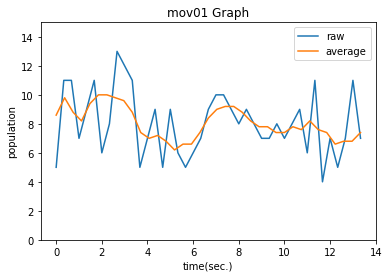

In [49]:
#원래와 어떻게 달라지는지 확인해보자! 
## mov01 

#원래 그래프
plt.plot(list_df['time'], list_df['people'], label = 'raw')

#달라진 그래프
ma_x , ma_y = moving_average(list_df['time'], list_df['people'])
plt.plot(ma_x, ma_y, label = 'average')

plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.title('mov01 Graph')
plt.ylim(0, 15)
plt.legend()
plt.show()

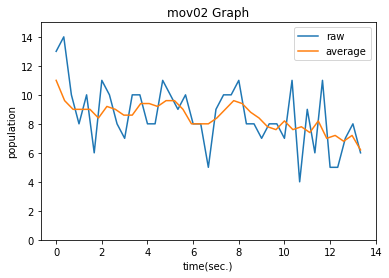

In [50]:
## mov02

#원래 그래프
plt.plot(list_df2['time'], list_df2['people'], label = 'raw')

#달라진 그래프
ma_x2 , ma_y2 = moving_average(list_df2['time'], list_df2['people'])
plt.plot(ma_x2, ma_y2, label = 'average')

plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.title('mov02 Graph')
plt.ylim(0, 15)
plt.legend()
plt.show()

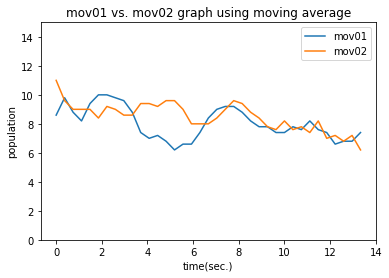

In [51]:
## 이번엔 mov01과 mov02를 비교해보자.

plt.plot(ma_x, ma_y, label = 'mov01')
plt.plot(ma_x2, ma_y2, label = 'mov02')
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.title('mov01 vs. mov02 graph using moving average')
plt.ylim(0, 15)
plt.legend()
plt.show()

이렇게 하면 아까 '대충 mov02가 사람이 더 많은것 같다' 에서, 정확하게 mov02가 더 사람이 많다는 것을 인정할 수 있다.  
(사실 mov02가 사람들이 더 카메라에 몰려 있어서 mov2가 더 많은 게 맞다!!)  

이렇게 이동평균을 사용하는 것 외에도, 더 정확하게 비교하기 위해 `HOG 크기 변경하기`, `특정 크기 이상의 사람만 검출하기`, `특정 크기 이하는 무시하기` 등의 규칙을 사용할 수 있다.  

---

이렇게 하여 이미지와 동영상을 파이썬으로 읽어오는 방법, 그리고 사람 얼굴을 인식하는 방법, 인식된 사람 수를 그래프로 표현하는 방법 등을 배웠다.  
완벽한 이미지 처리로는 불충분하지만, 이 장에서 배운 흐름을 이해한다면 다른 전문서적의 도움을 받아 고도의 이미지(동영상) 데이터 분석을 할 수 있을 것이다.  

이제 다음 장, 대망의 마지막 10장! 은 `자연어 처리(NLP)` 기술에 대해 배운다!!